본 ipynb 파일은 초기 제공 코드를 한국어 주석만 추가하고 분석한 파일로, 원본 파일이 더 자세히 적혀있고 의역이 있을 수 있다.

원본 파일 : ch2_nb1_mnist_keras.ipynb

In [4]:
import tensorflow as tf # 텐서플로 임포트

## Input data

In [5]:
num_classes = 10 # 클래스 개수 (0~9)
img_rows, img_cols = 28, 28 # 이미지 사이즈(가로, 세로 )
num_channels = 1 # 흑백
input_shape = (img_rows, img_cols, num_channels)

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 값 정규화(0~1사이)

## Building a simple model

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())# Flatten() : 2차원 배열(이미지) --> 1차원 배열로 전환 = 28*28 --> 784
model.add(tf.keras.layers.Dense(128, activation='relu')) # Output 크기가 128인 Dense layer
model.add(tf.keras.layers.Dense(num_classes, activation='softmax')) # Output 크기(Num_classes)10인 Dense layer

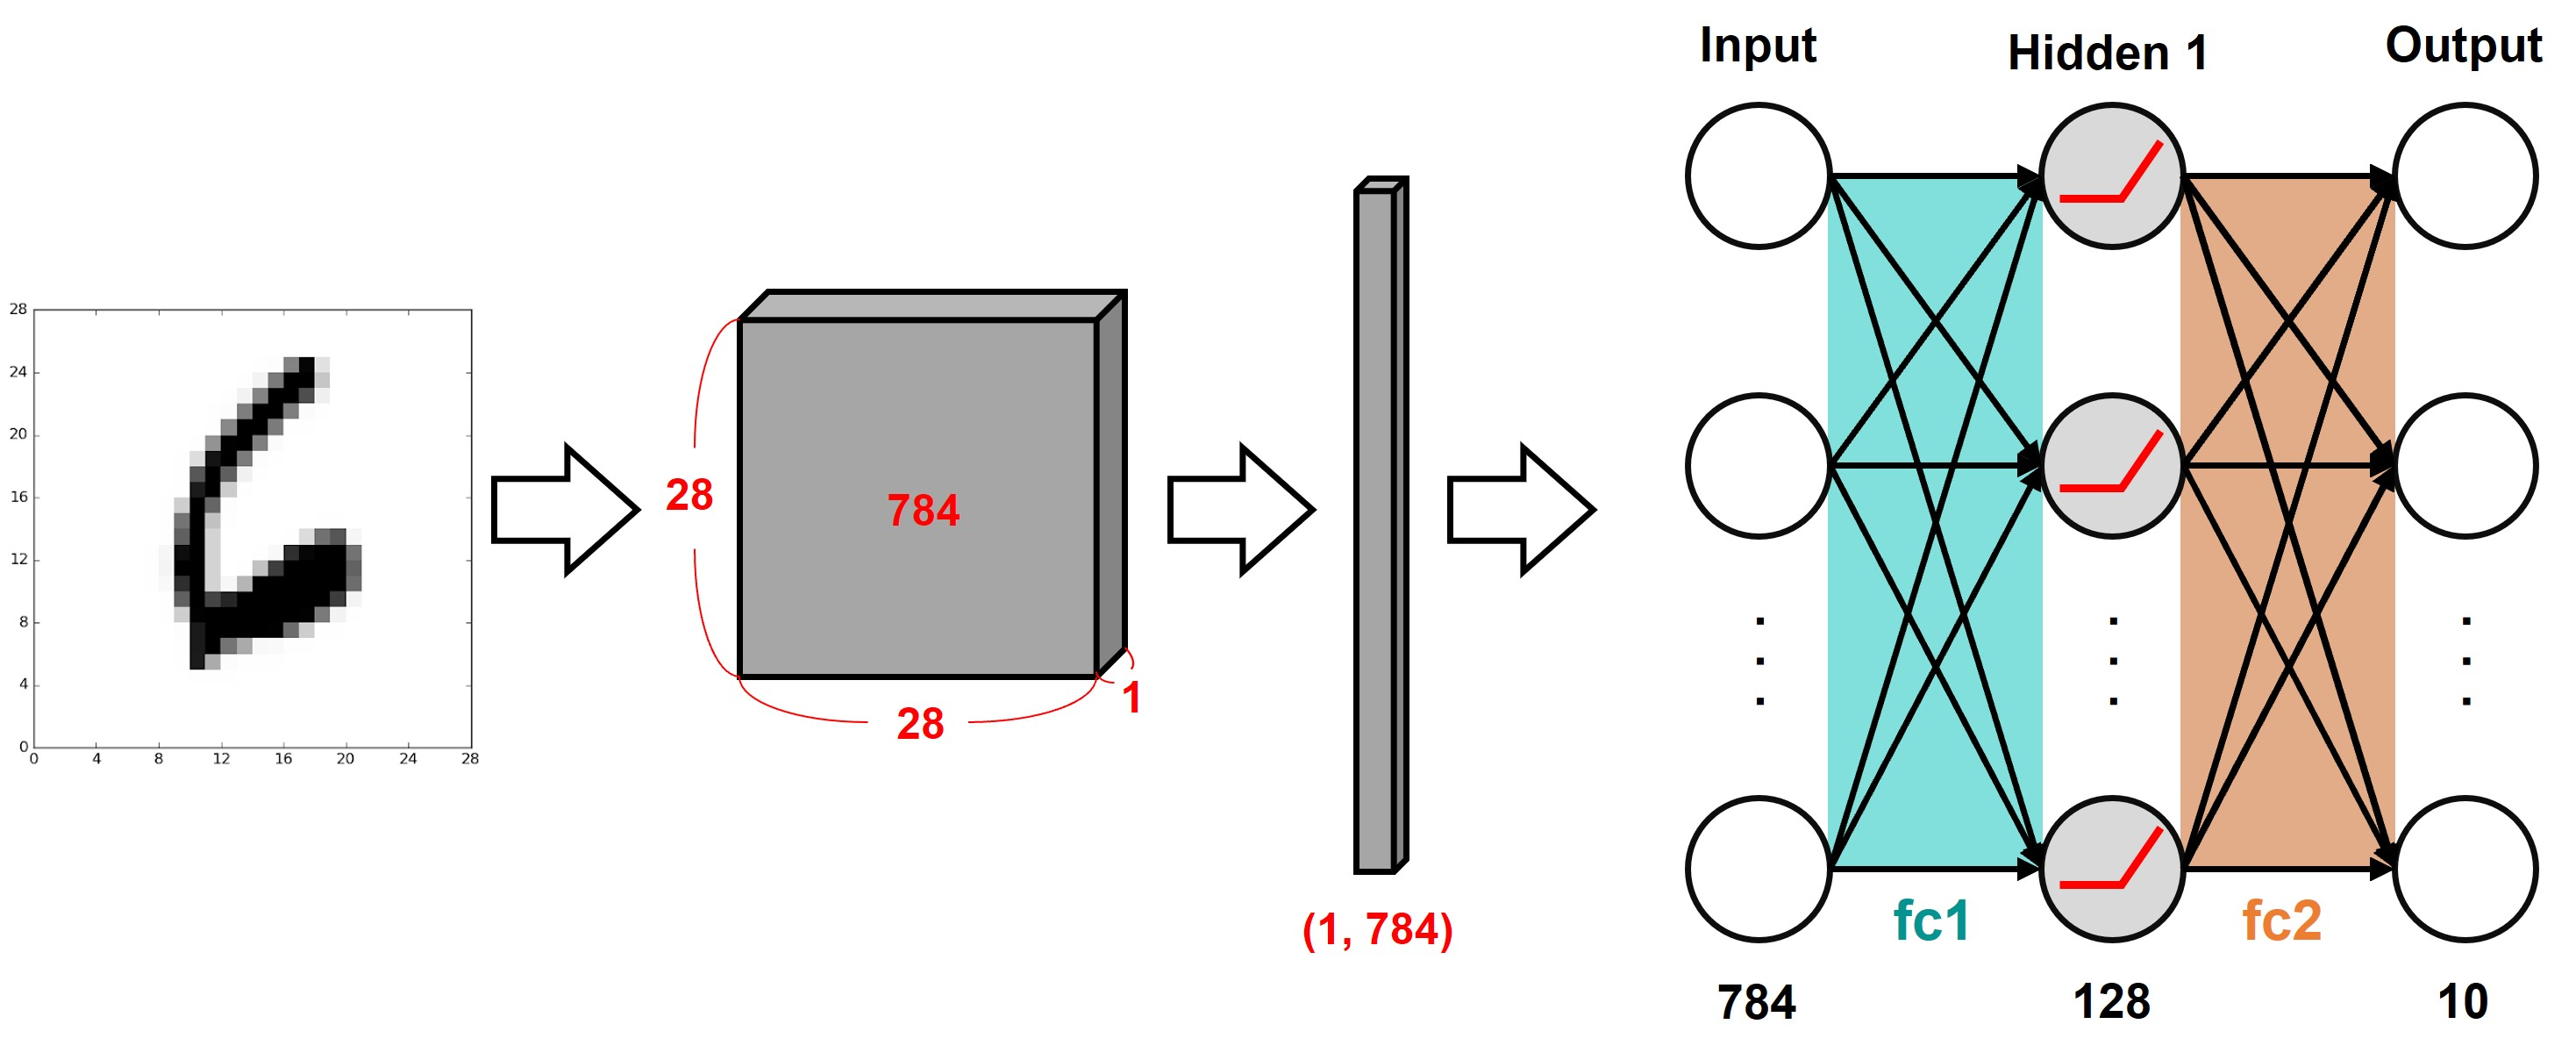

## Launch training

In [7]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
callbacks = [tf.keras.callbacks.TensorBoard('./keras')]# 학습 결과를 확인하기 위해서 Tensorboard를 로딩한다.
model.fit(x_train, y_train, epochs=25, verbose=1, validation_data=(x_test, y_test), callbacks=callbacks)
# Epoch : 25로 학습 진행
model.summary()#실제 모델의 사양을 확인하기 위함

Epoch 1/25
1875/1875 [==============================] - 8s 2ms/step - loss: 0.6614 - accuracy: 0.8346 - val_loss: 0.3600 - val_accuracy: 0.9041
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3379 - accuracy: 0.9054 - val_loss: 0.2943 - val_accuracy: 0.9159
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2887 - accuracy: 0.9192 - val_loss: 0.2631 - val_accuracy: 0.9276
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2575 - accuracy: 0.9279 - val_loss: 0.2383 - val_accuracy: 0.9350
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2345 - accuracy: 0.9347 - val_loss: 0.2203 - val_accuracy: 0.9362
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2155 - accuracy: 0.9399 - val_loss: 0.2057 - val_accuracy: 0.9410
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1998 - accuracy: 0.9449 - val_loss: 0.1925 - val_accuracy:

## Running with an estimator

In [8]:
estimator = tf.keras.estimator.model_to_estimator(model, model_dir='./estimator_dir')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using the Keras model provided.
INFO:tensorflow:Using config: {'_model_dir': './estimator_dir', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:435: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [9]:
BATCH_SIZE = 32
def train_input_fn():
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_dataset = train_dataset.batch(BATCH_SIZE).repeat()
    return train_dataset

estimator.train(train_input_fn, steps=len(x_train)//BATCH_SIZE)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='./estimator_dir/keras/keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})
INFO:tensorflow:Warm-starting from: ./estimator_dir/keras/keras_model.ckpt
INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.
INFO:tensorflow:Warm-started 4 variables.
INFO:tensorflow:Create CheckpointSaverHook.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:435: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into ./estimator_dir/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.0343116, step = 0
INFO:tensorflow:global_step/sec: 553.37
INFO:tensorflow:loss = 0.09883554, step = 100 (0.185 sec)
INFO:tensorflow:global_step/sec: 658.54
INFO:tensorflow:loss = 0.074023105, step = 200 (0.152 sec)
INFO:tensorflow:global_step/sec: 688.783
INFO:tensorflow:loss = 0.019131437, step = 300 (0.144 sec)
INFO:tensorflow:global_step/sec: 684.8
INFO:tensorflow:loss = 0.07546062, step = 400 (0.146 sec)
INFO:tensorflow:global_step/sec: 706.991
INFO:tensorflow:loss = 0.111222975, step = 500 (0.145 sec)
INFO:tensorflow:global_step/sec: 634.692
INFO:tensorflow:loss = 0.04000207, step = 600 (0.155 sec)
INFO:tensorflow:globa